<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/dynamica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import uuid 



In [41]:
import pandas as pd

# Cargar el archivo CSV
data = pd.read_csv("cleaned_inflation_data (1).csv")

# Asignar manualmente un unique_id secuencial a cada fila
data['unique_id'] = [f"Inflación" for i in range(1, len(data) + 1)]

# Mostrar los primeros registros para verificar
print(data.head())


         Date  Tasa de Inflación  unique_id
0  1996-01-01              27.70  Inflación
1  1997-01-01              15.72  Inflación
2  1998-01-01              18.61  Inflación
3  1999-01-01              12.32  Inflación
4  2000-01-01               8.96  Inflación


In [42]:
df = pd.DataFrame({"ds": data["Date"], "y": data["Tasa de Inflación"]})
df.head()

,ds,y
0,1996-01-01,27.70
1,1997-01-01,15.72
2,1998-01-01,18.61
3,1999-01-01,12.32
4,2000-01-01,8.96


In [43]:
fecha_2008 = pd.DataFrame({'ds': pd.to_datetime(["2008-11-01"]), '2018_outlier': [1]})
fecha_2020 = pd.DataFrame({'ds': pd.to_datetime(["2020-03-01"]), '2020_outlier': [1]})

In [44]:
df.dtypes

ds     object
y     float64
dtype: object

In [45]:
pip install statsforecast

Note: you may need to restart the kernel to use updated packages.


In [46]:
df.head()

,ds,y
0,1996-01-01,27.70
1,1997-01-01,15.72
2,1998-01-01,18.61
3,1999-01-01,12.32
4,2000-01-01,8.96


In [47]:
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast

In [48]:
# Create a list with the model and its instantiation parameters
models = [AutoARIMA(season_length=12)]

In [49]:
sf = StatsForecast(df=df,
    models=models,
    freq='MS',
    n_jobs=1,
)

C:\Users\rogel\anaconda3\lib\site-packages\statsforecast\core.py:474: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


ValueError: The following columns are missing: ['unique_id']

In [12]:
sf.fit()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [17]:
from statsforecast.arima import arima_string

In [18]:
arima_string(sf.fitted_[0,0].model_)

'Regression with ARIMA(0,1,1)(0,1,1)[12] errors'

In [20]:
df.tail()

,ds,y,unique_id,2018_outlier,2020_outlier
343,2023-08-01,5568.2127,Remesas,0.0,0.0
344,2023-09-01,5616.6566,Remesas,0.0,0.0
345,2023-10-01,5817.8272,Remesas,0.0,0.0
346,2023-11-01,4913.0348,Remesas,0.0,0.0
347,2023-12-01,5489.7036,Remesas,0.0,0.0


In [24]:
x_df = pd.DataFrame({"ds": [pd.to_datetime('2024-01-01'), pd.to_datetime('2024-02-01'), pd.to_datetime('2024-03-01')],
                     "2018_outlier": [0,0,0],
                     "2020_outlier": [0,0,0],
                     "unique_id": ["Remesas", "Remesas", "Remesas"]})
x_df.head()

,ds,2018_outlier,2020_outlier,unique_id
0,2024-01-01,0,0,Remesas
1,2024-02-01,0,0,Remesas
2,2024-03-01,0,0,Remesas


In [25]:
Y_hat_df = sf.forecast(3, X_df=x_df ,fitted=True)
values = sf.forecast_fitted_values()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:476: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [26]:
df['autoSarimaX'] = values['AutoARIMA'].values
df.head()

,ds,y,unique_id,2018_outlier,2020_outlier,autoarima_original
0,1995-01-01,254.5724,Remesas,0.0,0.0,254.425423
1,1995-02-01,248.0605,Remesas,0.0,0.0,247.999814
2,1995-03-01,287.3645,Remesas,0.0,0.0,287.291554
3,1995-04-01,298.9135,Remesas,0.0,0.0,298.848944
4,1995-05-01,357.7396,Remesas,0.0,0.0,357.634892


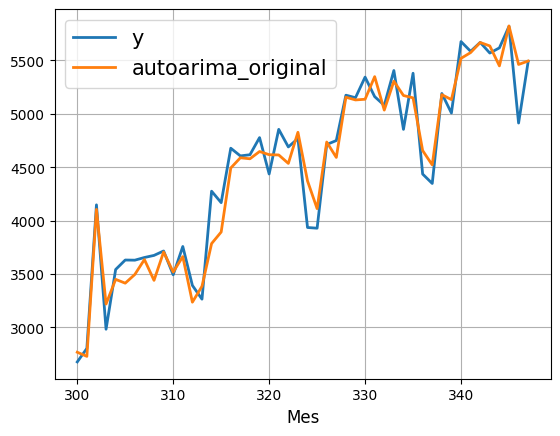

In [28]:
_, ax = plt.subplots(1, 1)
df[['y', 'autoarima_original']][300:].plot(ax=ax, linewidth=2)
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Mes', fontsize=12)
ax.legend(prop={'size': 15})
ax.grid(True)